In [1]:
from PyHugeGraph import PyHugeGraphClient
from helper.insert_data import insert_data
from helper.delete_data import delete_data
from helper.update_data import update_data
from helper.traversers import traversers
from helper.read_data import read_data
import matplotlib.pyplot as plt
import numpy as np

from helper import get_vertices_number

def mapping(l, key_1, key_2):
    return list(map(lambda x: x[key_1][key_2], l))


databases = ['node_10', 'node_100', 'node_1000', 'node_10000', 'node_100000', 'node_1000000']

In [2]:
def plot(title, x_labels, X_axis, time, option="vertices"):
    plt.figure(figsize=(10,10))
    plt.title(title)

    plt.xticks(X_axis, x_labels) #, rotation=45
    plt.bar(X_axis - 0.4, mapping(time, option, "min"), 0.4, label="min")
    plt.bar(X_axis, mapping(time, option, "mean"), 0.4, label="mean")
    plt.bar(X_axis + 0.4, mapping(time, option, "max"), 0.4, label="max")

    plt.legend()

def compare_total_times(time):
    pass

In [9]:
def execute_database(database, large=True):
    hg = PyHugeGraphClient.HugeGraphClient("http://localhost", "8081", database)
    
    vertices = get_vertices_number(database, False)

    file = open(database + ".txt", 'r')
    lines = file.readlines()
    time = []

    if not large:
        time.append(insert_data.insert_data(lines, hg))
        time.append(update_data.update_data(hg, vertices))
        time.append(update_data.update_gremlin(database, vertices))
        time.append(update_data.batch_update(hg=hg, lines=lines, NUMBER_OF_VERTICES=vertices, batch_vertices=500, batch_edges=250, percentage=None))
        time.append(read_data.read_data(hg=hg, NUMBER_OF_VERTICES=vertices))
        time.append(read_data.read_gremlin(database, vertices, True))
        time.append(delete_data.delete_data(hg=hg, NUMBER_OF_vertices=vertices))
        time.append(insert_data.batch_insert(hg=hg, lines=lines, NUMBER_OF_VERTICES=vertices, batch_vertices=500, batch_edges=250))
        time.append(delete_data.delete_gremlin_alltogether(database, vertices))
            
        x_labels = ["insert", "update", "upd_gremlin", "batch_upd", "read", "rd_gremlin", "delete", "batch_insert", "del_gremlin"]
    else:
        time.append(insert_data.batch_insert(hg=hg, lines=lines, NUMBER_OF_VERTICES=vertices, batch_vertices=500, batch_edges=250))
        time.append(update_data.batch_update(hg=hg, lines=lines, NUMBER_OF_VERTICES=vertices, batch_vertices=500, batch_edges=250, percentage=None))
        time.append(read_data.read_data(hg=hg, NUMBER_OF_VERTICES=vertices))
        time.append(delete_data.delete_data(hg=hg, NUMBER_OF_vertices=vertices))
        x_labels = ["batch_insert", "batch_update", "read", "delete"]

    X_axis = np.arange(len(x_labels))*2

    plot("Basic sequence on " + database + ": Vertices", x_labels, X_axis, time, "vertices")
    plot("Basic sequence on " + database + ": Edges", x_labels, X_axis, time, "edges")

    if not large:
        return {
            "insert": time[0],
            "update_insert": time[1],
            "update_gremlin": time[2],
            "batch_update": time[3],
            "read": time[4],
            "read_gremlin": time[5],
            "delete": time[6],
            "batch_insert": time[7],
            "delete_gremlin": time[8],
        }
    else:
        return {
            "batch insert": time[0],
            "batch update": time[1],
            "read": time[2],
            "delete": time[3],
        }

tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 117.78it/s]


length = 32


tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 271.83it/s]


length = 32


tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 45.55it/s]


{'requestId': '68f0980a-ad90-406c-bf15-1e443b43be5b', 'status': {'message': '', 'code': 200, 'attributes': {}}, 'result': {'data': [], 'meta': {}}}
[{'vertices': {'mean': 0.003238272666931152, 'max': 0.004421710968017578, 'min': 0.0019829273223876953, 'number_of_vertices': 10}, 'edges': {'mean': 0.0033994038899739583, 'max': 0.0067479610443115234, 'min': 0.0020520687103271484, 'number_of_edges': 60}, 'total_time': 0.23692059516906738}, {'edges': {'mean': 0.003947754700978597, 'max': 0.006561279296875, 'min': 0.0026624202728271484, 'total_time': 0.2668147087097168}, 'vertices': {'mean': 0.0024717569351196287, 'max': 0.0038836002349853516, 'min': 0.0017685890197753906, 'total_time': 0.02479267120361328}}, {'edges': {'edges_updated': 60, 'min': 0.003511667251586914, 'max': 0.022615432739257812, 'mean': 0.00793922742207845, 'total_time': 0.5120534896850586}, 'vertices': {'min': 0.004498481750488281, 'max': 0.0321810245513916, 'mean': 0.015260076522827149, 'total_time': 0.1527860164642334}}

tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 82.68it/s]


length = 600


tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 63.35it/s]


length = 600


tqdm() Progress Bar: 100%|██████████| 5/5 [00:00<00:00, 14.13it/s]


{'requestId': 'a93bbd73-6b12-48c5-89eb-7850c0b2ec56', 'status': {'message': '', 'code': 200, 'attributes': {}}, 'result': {'data': [], 'meta': {}}}
[{'vertices': {'mean': 0.002526524066925049, 'max': 0.004743814468383789, 'min': 0.0017080307006835938, 'number_of_vertices': 100}, 'edges': {'mean': 0.002926130956630643, 'max': 0.024162769317626953, 'min': 0.001924753189086914, 'number_of_edges': 1196}, 'total_time': 3.7616310119628906}, {'edges': {'mean': 0.0031623355919700802, 'max': 0.01925516128540039, 'min': 0.002342700958251953, 'total_time': 4.07384467124939}, 'vertices': {'mean': 0.002175610065460205, 'max': 0.004716634750366211, 'min': 0.001596212387084961, 'total_time': 0.21814727783203125}}, {'edges': {'edges_updated': 1196, 'min': 0.003257274627685547, 'max': 0.051085710525512695, 'mean': 0.0076001952324423905, 'total_time': 9.472584009170532}, 'vertices': {'min': 0.0030133724212646484, 'max': 0.027848005294799805, 'mean': 0.007519195079803467, 'total_time': 0.7527945041656494

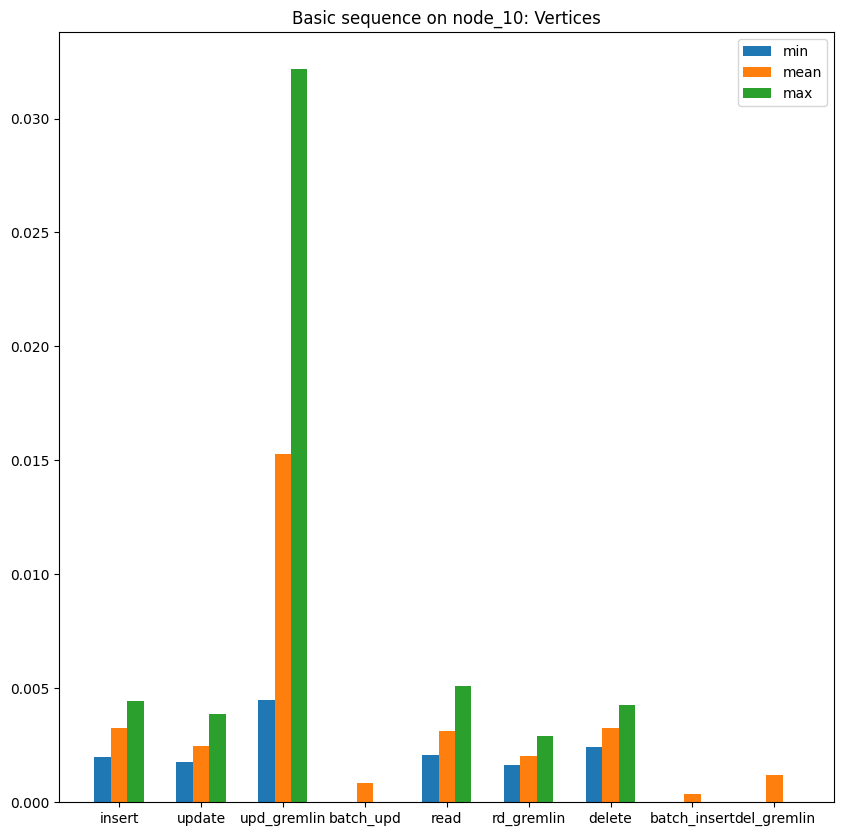

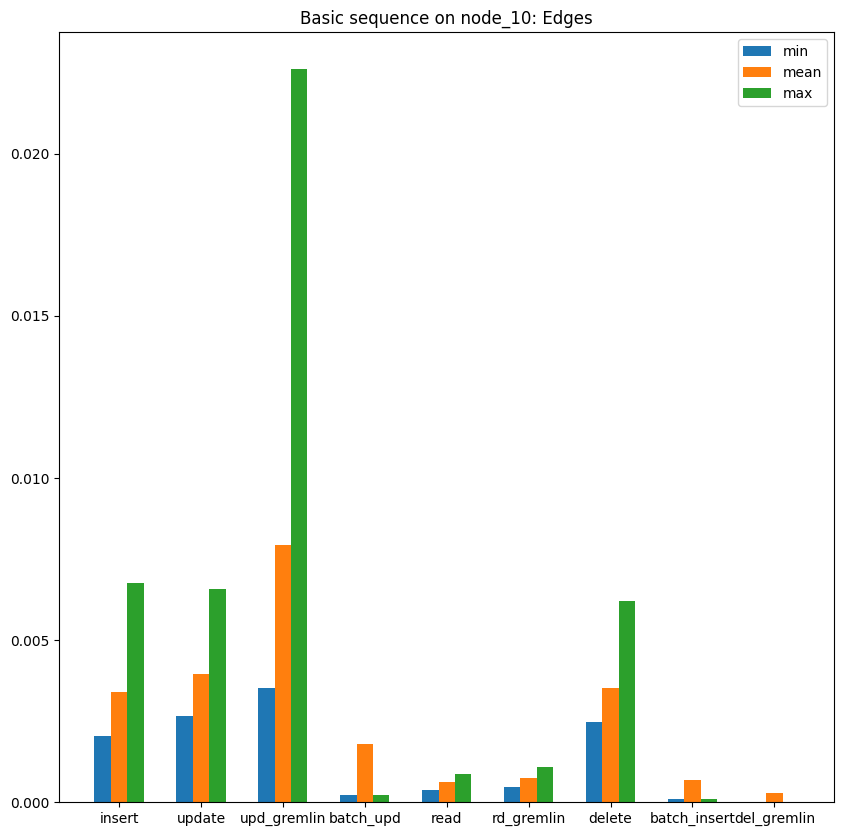

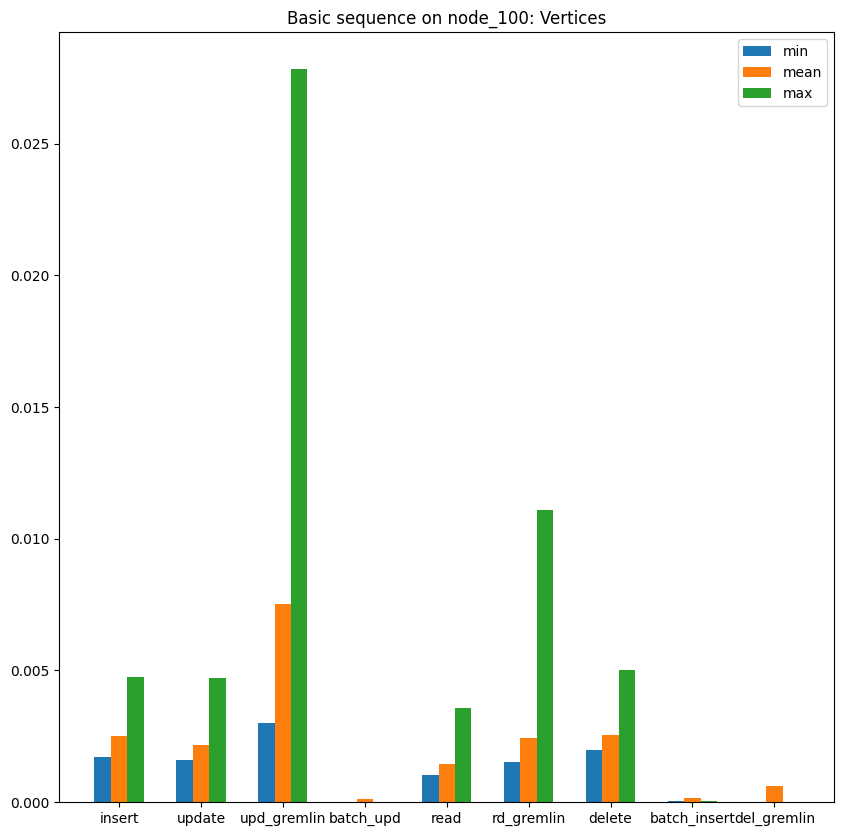

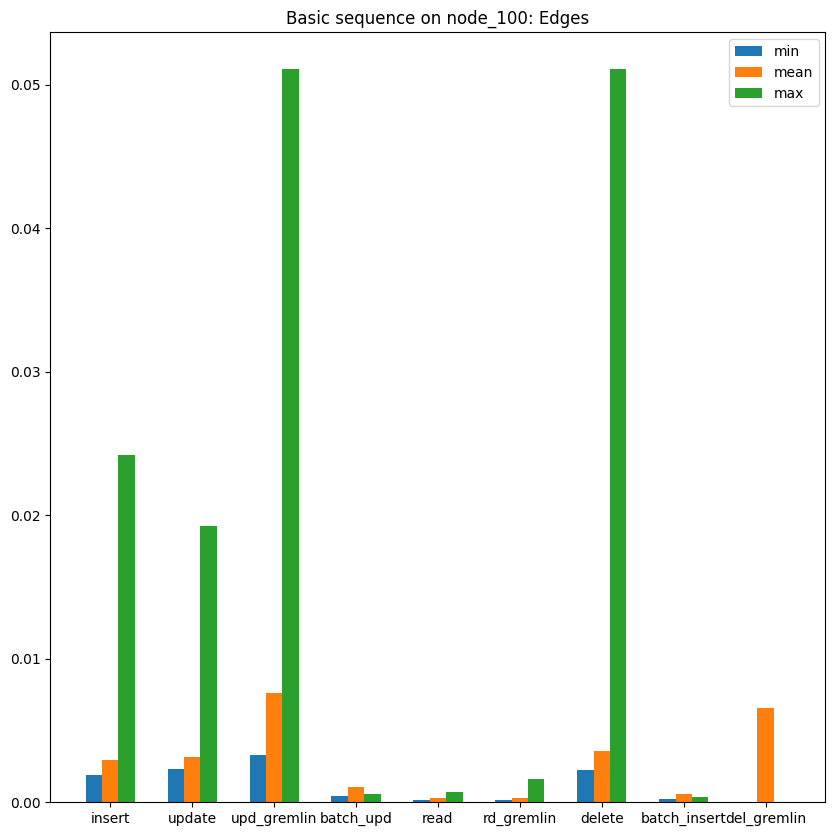

In [10]:
results = {}
large = False
for db in databases:
    if db == "node_1000":
        large = True
    results[db] = execute_database(db, large)

In [11]:
results

{'node_10': {'insert': {'vertices': {'mean': 0.003238272666931152,
    'max': 0.004421710968017578,
    'min': 0.0019829273223876953,
    'number_of_vertices': 10},
   'edges': {'mean': 0.0033994038899739583,
    'max': 0.0067479610443115234,
    'min': 0.0020520687103271484,
    'number_of_edges': 60},
   'total_time': 0.23692059516906738},
  'update_insert': {'edges': {'mean': 0.003947754700978597,
    'max': 0.006561279296875,
    'min': 0.0026624202728271484,
    'total_time': 0.2668147087097168},
   'vertices': {'mean': 0.0024717569351196287,
    'max': 0.0038836002349853516,
    'min': 0.0017685890197753906,
    'total_time': 0.02479267120361328}},
  'update_gremlin': {'edges': {'edges_updated': 60,
    'min': 0.003511667251586914,
    'max': 0.022615432739257812,
    'mean': 0.00793922742207845,
    'total_time': 0.5120534896850586},
   'vertices': {'min': 0.004498481750488281,
    'max': 0.0321810245513916,
    'mean': 0.015260076522827149,
    'total_time': 0.1527860164642334}